In [5]:
#importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#pulling csv file

aviation = pd.read_csv('./airplane_data/AviationData.csv', encoding='latin-1')

/Users/goknurkaya/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:

# 2008 - present
aviation["Year"] = aviation["Event.Date"].map(lambda x : x[:4] )
aviation["Year"] = aviation["Year"].astype(int)
aviation_2008 = aviation[aviation["Year"] >= 2008]

# Only Airplanes
aviation_2008 = aviation_2008[aviation_2008["Aircraft.Category"] == "Airplane"]

# drop.na:
# engine numbers
aviation_2008 = airplane_2008.dropna(subset=["Number.of.Engines"])

# engine types
aviation_2008 = airplane_2008.dropna(subset=["Engine.Type"])


#filtering amateur built
aviation_2008 = aviation_2008[aviation_2008['Amateur.Built'] == 'No']

In [25]:
aviation_2008['Amateur.Built'].value_counts()

No    14100
Name: Amateur.Built, dtype: int64

In [26]:
aviation_2008.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,14100.000000,14100.000000,14100.000000,14100.000000,14100.000000,14100.000000
mean,1.164326,0.338298,0.294326,0.158652,5.108865,2013.818298
std,0.404270,1.712268,2.017136,0.668572,26.538977,3.941919
min,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2014.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2017.000000
max,8.000000,157.000000,137.000000,50.000000,576.000000,2022.000000


In [29]:
aviation_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14100 entries, 63914 to 88767
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                14100 non-null  object 
 1   Investigation.Type      14100 non-null  object 
 2   Accident.Number         14100 non-null  object 
 3   Event.Date              14100 non-null  object 
 4   Location                14100 non-null  object 
 5   Country                 14100 non-null  object 
 6   Latitude                13782 non-null  object 
 7   Longitude               13782 non-null  object 
 8   Airport.Code            10281 non-null  object 
 9   Airport.Name            10450 non-null  object 
 10  Injury.Severity         13960 non-null  object 
 11  Aircraft.damage         13657 non-null  object 
 12  Aircraft.Category       14100 non-null  object 
 13  Registration.Number     14100 non-null  object 
 14  Make                    14100 non-

In [30]:
aviation_2008.shape

(14100, 32)

In [31]:
# Adding "Year" column
aviation_2008["Year"] = aviation_2008["Event.Date"].map(lambda x : x[:4] )

<ipython-input-37-cb62edd4ad00>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years, rotation = 90)


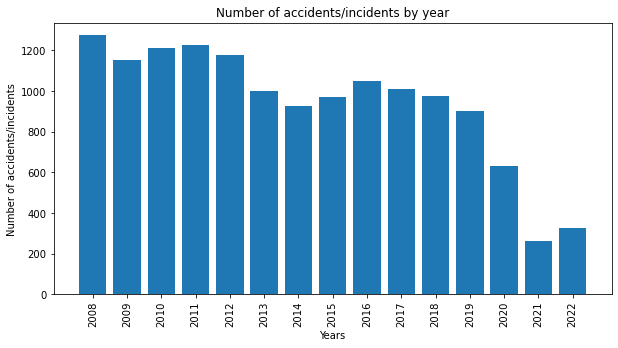

In [37]:
# Investigating frequency of accidents/incidents by year
years = aviation_2008["Year"].value_counts().sort_index().index
fre_years = aviation_2008["Year"].value_counts().sort_index().values

# Plotting
fig, ax = plt.subplots( figsize = (10, 5))
ax.bar(years, fre_years)
ax.set_xticklabels(years, rotation = 90)
ax.set_ylabel("Number of accidents/incidents")
ax.set_xlabel("Years")
ax.set_title("Number of accidents/incidents by year");


In [46]:
# Filtering out others than "Airplane" in "Aircraft.Category"
#df_airplane = df[df["Aircraft.Category"] == "Airplane"]

# Adding a column of "Year"
#df_airplane["Year"] = df_airplane["Event.Date"].map(lambda x : x[:4] )

<ipython-input-47-a2067ecdb4b1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a_year, rotation=90)


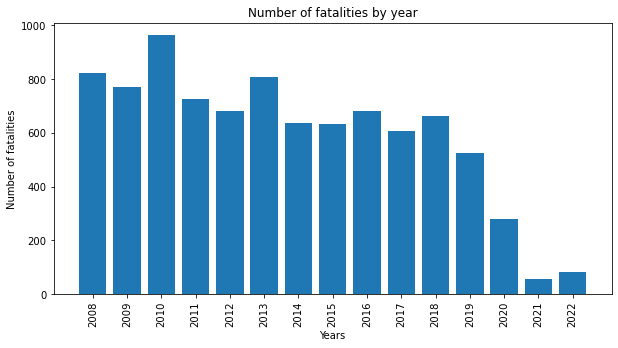

In [47]:
# Investigating fatality by year 
aviation_2008['Total_Injuries'] = aviation_2008['Total.Fatal.Injuries'] + aviation_2008['Total.Serious.Injuries']
a_year = aviation_2008.groupby("Year")["Total_Injuries"].sum().index

fatality = aviation_2008.groupby("Year")["Total_Injuries"].sum().values

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(a_year, fatality)
ax.set_xticklabels(a_year, rotation=90)
ax.set_ylabel("Number of fatalities")
ax.set_xlabel("Years")
ax.set_title("Number of fatalities by year");


In [48]:
# Percentage of Accidents/Incidents by Number of Engines
aviation_2008["Number.of.Engines"].value_counts(normalize = True)

1.0    0.843972
2.0    0.151348
4.0    0.003475
3.0    0.001064
8.0    0.000071
0.0    0.000071
Name: Number.of.Engines, dtype: float64

In [49]:
# Percentage of Accidents/Incidents by Engine Type
aviation_2008["Engine.Type"].value_counts(normalize = True)

Reciprocating      0.864043
Turbo Prop         0.072908
Turbo Fan          0.052482
Turbo Jet          0.007730
Unknown            0.001206
Geared Turbofan    0.000780
Turbo Shaft        0.000426
Electric           0.000355
UNK                0.000071
Name: Engine.Type, dtype: float64

In [50]:
df_engine = aviation_2008[aviation_2008["Number.of.Engines"] > 1]
df_engine["Number.of.Engines"].value_counts(normalize = True)

2.0    0.970441
4.0    0.022283
3.0    0.006821
8.0    0.000455
Name: Number.of.Engines, dtype: float64

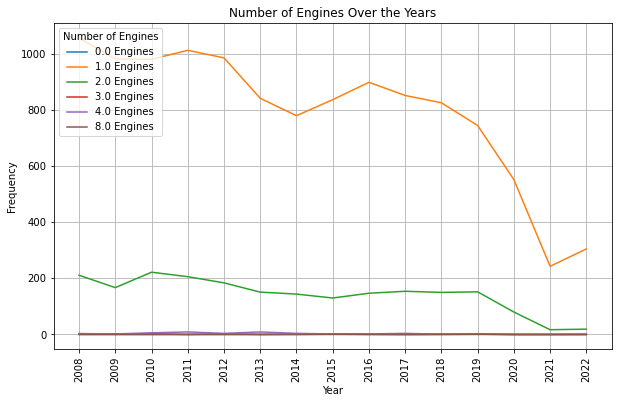

In [53]:
# Want to see engine number based on year 
# Pivot the DataFrame to have each unique number_of_engines as a separate column
pivot_df = aviation_2008.pivot_table(index='Year', columns='Number.of.Engines', aggfunc='size', fill_value=0)

# Create a line plot for each column
plt.figure(figsize=(10, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=f'{column} Engines')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Engines Over the Years')
plt.legend(title='Number of Engines', loc='upper left')
plt.grid(True)
plt.xticks(rotation = 90)

# Show the plot
plt.show()

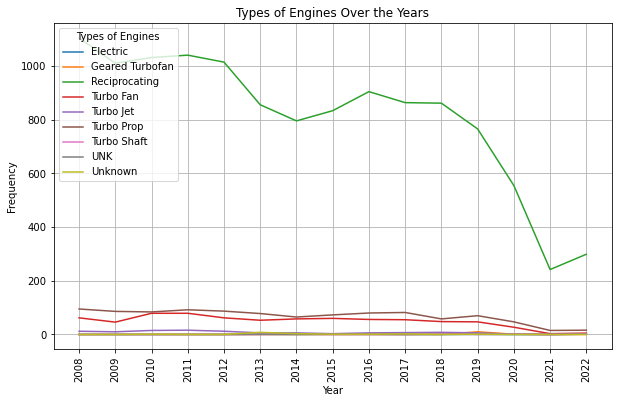

In [54]:
# Want to see engine type based on year 
# Pivot the DataFrame to have each unique number_of_engines as a separate column
pivot_df1 = aviation_2008.pivot_table(index='Year', columns='Engine.Type', aggfunc='size', fill_value=0)

# Create a line plot for each column
plt.figure(figsize=(10, 6))
for column in pivot_df1.columns:
    plt.plot(pivot_df1.index, pivot_df1[column], label=f'{column}')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Types of Engines Over the Years')
plt.legend(title='Types of Engines', loc='upper left')
plt.grid(True)
plt.xticks(rotation = 90)

# Show the plot
plt.show()